#Análise do eleitorado brasileiro

In [1]:
import pandas as pd

In [2]:
#carregando o arquivo csv
df = pd.read_csv('eleitorado_municipio_2018.csv', sep=';', encoding='latin1')
df.head()

NR_ANO_ELEICAO  CD_PAIS NM_PAIS SG_REGIAO NM_REGIAO SG_UF NM_UF  \
0            2018        1  Brasil         N     Norte    AC  Acre   
1            2018        1  Brasil         N     Norte    AC  Acre   
2            2018        1  Brasil         N     Norte    AC  Acre   
3            2018        1  Brasil         N     Norte    AC  Acre   
4            2018        1  Brasil         N     Norte    AC  Acre   

   CD_MUNICIPIO  NM_MUNICIPIO  QTD_ELEITORES           ...             \
0          1120    ACRELÂNDIA           8809           ...              
1          1570  ASSIS BRASIL           5726           ...              
2          1058     BRASILÉIA          16041           ...              
3          1007        BUJARI           8683           ...              
4          1015      CAPIXABA           6832           ...              

   QTD_ELEITORES_90A94  QTD_ELEITORES_95A99  QTD_ELEITORES_MAIORIGUAL100  \
0                    8                    2                            0   
1                   14                    4                            0   
2                   14                    4                            4   
3                   11                    2                            0   
4                    5                    1                            0   

   QTD_ELEITORES_IDADEINVALIDO  QTD_ELEITORES_IDADENAOSEAPLICA  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   QTD_ELEITORES_IDADENAOINFORMADA  QTD_ELEITORES_COMBIOMETRIA  \
0                                0                        8784   
1                                0                        5712   
2                                0                       15905   
3                                0                        8665   
4                                0                        6820   

   QTD_ELEITORES_SEMBIOMETRIA  QTD_ELEITORES_DEFICIENTE  \
0                          25                        35   
1                          14                        13   
2                         136                        92   
3                          18                        18   
4                          12                        78   

   QUANTITATIVO_NOMESOCIAL  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 43 columns]

In [3]:
#Tipos e quantidades dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741 entries, 0 to 5740
Data columns (total 43 columns):
NR_ANO_ELEICAO                     5741 non-null int64
CD_PAIS                            5741 non-null int64
NM_PAIS                            5741 non-null object
SG_REGIAO                          5741 non-null object
NM_REGIAO                          5741 non-null object
SG_UF                              5741 non-null object
NM_UF                              5741 non-null object
CD_MUNICIPIO                       5741 non-null int64
NM_MUNICIPIO                       5741 non-null object
QTD_ELEITORES                      5741 non-null int64
QTD_ELEITORES_FEMININO             5741 non-null int64
QTD_ELEITORES_MASCULINO            5741 non-null int64
QTD_ELEITORES_NAOINFORMADO         5741 non-null int64
QTD_ELEITORES_MENOR16              5741 non-null int64
QTD_ELEITORES_16                   5741 non-null int64
QTD_ELEITORES_17                   5741 non-null int64
QTD_ELE

In [6]:
#As 5 cidades com a maior quantidade de eleitores deficientes
df.nlargest(5, 'QTD_ELEITORES_DEFICIENTE')

NR_ANO_ELEICAO  CD_PAIS NM_PAIS SG_REGIAO NM_REGIAO SG_UF  \
5358            2018        1  Brasil        SE   Sudeste    SP   
3660            2018        1  Brasil        SE   Sudeste    RJ   
4990            2018        1  Brasil        SE   Sudeste    SP   
535             2018        1  Brasil        NE  Nordeste    BA   
4010            2018        1  Brasil         S       Sul    RS   

                  NM_UF  CD_MUNICIPIO    NM_MUNICIPIO  QTD_ELEITORES  \
5358          São Paulo         71072       SÃO PAULO        9052724   
3660     Rio de Janeiro         60011  RIO DE JANEIRO        4891885   
4990          São Paulo         64777       GUARULHOS         814342   
535               Bahia         38490        SALVADOR        1827436   
4010  Rio Grande do Sul         85995   CAXIAS DO SUL         322901   

               ...             QTD_ELEITORES_90A94  QTD_ELEITORES_95A99  \
5358           ...                           77321                33110   
3660           ...                           81644                36069   
4990           ...                             117                   13   
535            ...                             939                  164   
4010           ...                             336                   46   

      QTD_ELEITORES_MAIORIGUAL100  QTD_ELEITORES_IDADEINVALIDO  \
5358                         3439                           96   
3660                         2219                           64   
4990                            4                            7   
535                            34                            7   
4010                            2                            0   

      QTD_ELEITORES_IDADENAOSEAPLICA  QTD_ELEITORES_IDADENAOINFORMADA  \
5358                               0                                0   
3660                               0                                0   
4990                               0                                0   
535                                0                                0   
4010                               0                                0   

      QTD_ELEITORES_COMBIOMETRIA  QTD_ELEITORES_SEMBIOMETRIA  \
5358                     4346933                     4705791   
3660                      691875                     4200010   
4990                      813706                         636   
535                      1826047                        1389   
4010                      322336                         565   

      QTD_ELEITORES_DEFICIENTE  QUANTITATIVO_NOMESOCIAL  
5358                    138884                      551  
3660                     23228                      203  
4990                     22266                       82  
535                      19305                      122  
4010                     18360                       14  

[5 rows x 43 columns]

In [7]:
print('Eleitoras: ', df['QTD_ELEITORES_FEMININO'].sum())
print('Eleitores: ', df['QTD_ELEITORES_MASCULINO'].sum())
print('Eleitorxs: ', df['QTD_ELEITORES_NAOINFORMADO'].sum())


Eleitoras:  77339897
Eleitores:  69902977
Eleitorxs:  63401


In [8]:
#Criar variáveis para calcular o percentual
tot_eleitores = df['QTD_ELEITORES'].sum()
tot_feminino = df['QTD_ELEITORES_FEMININO'].sum()
tot_masculino = df['QTD_ELEITORES_MASCULINO'].sum()
total_nao_informado = df['QTD_ELEITORES_NAOINFORMADO'].sum()

In [11]:
#Mostrar os valores percentualmente
print('Eleitoras: ', ((tot_feminino/tot_eleitores)*100).round(2))
print('Eleitores: ', ((tot_masculino/tot_eleitores)*100).round(2))
print('Eleitorxs: ', ((total_nao_informado/tot_eleitores)*100).round(2))

Eleitoras:  52.5
Eleitores:  47.45
Eleitorxs:  0.04


In [17]:
#Quantos municípios existem com mais homens que mulheres?
df[df['QTD_ELEITORES_MASCULINO'] > df['QTD_ELEITORES_FEMININO']].count()

NR_ANO_ELEICAO                     2279
CD_PAIS                            2279
NM_PAIS                            2279
SG_REGIAO                          2279
NM_REGIAO                          2279
SG_UF                              2279
NM_UF                              2279
CD_MUNICIPIO                       2279
NM_MUNICIPIO                       2279
QTD_ELEITORES                      2279
QTD_ELEITORES_FEMININO             2279
QTD_ELEITORES_MASCULINO            2279
QTD_ELEITORES_NAOINFORMADO         2279
QTD_ELEITORES_MENOR16              2279
QTD_ELEITORES_16                   2279
QTD_ELEITORES_17                   2279
QTD_ELEITORES_18                   2279
QTD_ELEITORES_19                   2279
QTD_ELEITORES_20                   2279
QTD_ELEITORES_21A24                2279
QTD_ELEITORES_25A29                2279
QTD_ELEITORES_30A34                2279
QTD_ELEITORES_35A39                2279
QTD_ELEITORES_40A44                2279
QTD_ELEITORES_45A49                2279


In [19]:
#Criando uma nova coluna indicando a relação feminino/masculino
df['RELACAO_FM'] = df['QTD_ELEITORES_FEMININO']/df['QTD_ELEITORES_MASCULINO']

In [20]:
#Quais são os municípios com maior relação F/M ( tem mais mulheres do que homens)
df.nlargest(5,'RELACAO_FM')

NR_ANO_ELEICAO  CD_PAIS   NM_PAIS SG_REGIAO NM_REGIAO SG_UF     NM_UF  \
5581            2018        2  Exterior         E  Exterior    ZZ  Exterior   
5613            2018        2  Exterior         E  Exterior    ZZ  Exterior   
5652            2018        2  Exterior         E  Exterior    ZZ  Exterior   
5658            2018        2  Exterior         E  Exterior    ZZ  Exterior   
5653            2018        2  Exterior         E  Exterior    ZZ  Exterior   

      CD_MUNICIPIO NM_MUNICIPIO  QTD_ELEITORES     ...      \
5581         99350       BAMAKO              1     ...       
5613         38920      COTONOU              2     ...       
5652         99422       LETHEM              1     ...       
5658         29963         LOMÉ              3     ...       
5653         29939   LIBREVILLE             21     ...       

      QTD_ELEITORES_95A99  QTD_ELEITORES_MAIORIGUAL100  \
5581                    0                            0   
5613                    0                            0   
5652                    0                            0   
5658                    0                            0   
5653                    0                            0   

      QTD_ELEITORES_IDADEINVALIDO  QTD_ELEITORES_IDADENAOSEAPLICA  \
5581                            0                               0   
5613                            0                               0   
5652                            0                               0   
5658                            0                               0   
5653                            0                               0   

      QTD_ELEITORES_IDADENAOINFORMADA  QTD_ELEITORES_COMBIOMETRIA  \
5581                                0                           0   
5613                                0                           0   
5652                                0                           1   
5658                                0                           0   
5653                                0                           0   

      QTD_ELEITORES_SEMBIOMETRIA  QTD_ELEITORES_DEFICIENTE  \
5581                           1                         0   
5613                           2                         0   
5652                           0                         0   
5658                           3                         0   
5653                          21                         0   

      QUANTITATIVO_NOMESOCIAL  RELACAO_FM  
5581                        0         inf  
5613                        0         inf  
5652                        0         inf  
5658                        0         inf  
5653                        0    9.500000  

[5 rows x 44 columns]

In [21]:
#Quais são os municípios com menor relação F/M ( tem mais homens do que mulheres)
df.nsmallest(5,'RELACAO_FM')

NR_ANO_ELEICAO  CD_PAIS   NM_PAIS SG_REGIAO NM_REGIAO SG_UF     NM_UF  \
5592            2018        2  Exterior         E  Exterior    ZZ  Exterior   
5610            2018        2  Exterior         E  Exterior    ZZ  Exterior   
5625            2018        2  Exterior         E  Exterior    ZZ  Exterior   
5719            2018        2  Exterior         E  Exterior    ZZ  Exterior   
5639            2018        2  Exterior         E  Exterior    ZZ  Exterior   

      CD_MUNICIPIO  NM_MUNICIPIO  QTD_ELEITORES     ...      \
5592         39187   BRAZZAVILLE              3     ...       
5610         38903       CONACRI              2     ...       
5625         99406      FREETOWN              2     ...       
5719         30546         SÓFIA             16     ...       
5639         38989  IEREVAN-ARME             12     ...       

      QTD_ELEITORES_95A99  QTD_ELEITORES_MAIORIGUAL100  \
5592                    0                            0   
5610                    0                            0   
5625                    0                            0   
5719                    0                            0   
5639                    0                            0   

      QTD_ELEITORES_IDADEINVALIDO  QTD_ELEITORES_IDADENAOSEAPLICA  \
5592                            0                               0   
5610                            0                               0   
5625                            0                               0   
5719                            0                               0   
5639                            0                               0   

      QTD_ELEITORES_IDADENAOINFORMADA  QTD_ELEITORES_COMBIOMETRIA  \
5592                                0                           0   
5610                                0                           0   
5625                                0                           0   
5719                                0                           0   
5639                                0                           0   

      QTD_ELEITORES_SEMBIOMETRIA  QTD_ELEITORES_DEFICIENTE  \
5592                           3                         0   
5610                           2                         0   
5625                           2                         0   
5719                          16                         0   
5639                          12                         0   

      QUANTITATIVO_NOMESOCIAL  RELACAO_FM  
5592                        0    0.000000  
5610                        0    0.000000  
5625                        0    0.000000  
5719                        0    0.230769  
5639                        0    0.333333  

[5 rows x 44 columns]

In [22]:
#Vamos criar um novo data frame só com municípios do Brasil
df_brasil = df[df['CD_PAIS'] ==1].copy()

df_brasil.head()

NR_ANO_ELEICAO  CD_PAIS NM_PAIS SG_REGIAO NM_REGIAO SG_UF NM_UF  \
0            2018        1  Brasil         N     Norte    AC  Acre   
1            2018        1  Brasil         N     Norte    AC  Acre   
2            2018        1  Brasil         N     Norte    AC  Acre   
3            2018        1  Brasil         N     Norte    AC  Acre   
4            2018        1  Brasil         N     Norte    AC  Acre   

   CD_MUNICIPIO  NM_MUNICIPIO  QTD_ELEITORES     ...      QTD_ELEITORES_95A99  \
0          1120    ACRELÂNDIA           8809     ...                        2   
1          1570  ASSIS BRASIL           5726     ...                        4   
2          1058     BRASILÉIA          16041     ...                        4   
3          1007        BUJARI           8683     ...                        2   
4          1015      CAPIXABA           6832     ...                        1   

   QTD_ELEITORES_MAIORIGUAL100  QTD_ELEITORES_IDADEINVALIDO  \
0                            0                            0   
1                            0                            0   
2                            4                            0   
3                            0                            0   
4                            0                            0   

   QTD_ELEITORES_IDADENAOSEAPLICA  QTD_ELEITORES_IDADENAOINFORMADA  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   QTD_ELEITORES_COMBIOMETRIA  QTD_ELEITORES_SEMBIOMETRIA  \
0                        8784                          25   
1                        5712                          14   
2                       15905                         136   
3                        8665                          18   
4                        6820                          12   

   QTD_ELEITORES_DEFICIENTE  QUANTITATIVO_NOMESOCIAL  RELACAO_FM  
0                        35                        0    0.963227  
1                        13                        0    1.005604  
2                        92                        0    1.058122  
3                        18                        0    0.975205  
4                        78                        0    0.947548  

[5 rows x 44 columns]

In [23]:
#Quais são os municípios com menor relação F/M ( tem mais homens do que mulheres)
df_brasil.nsmallest(5,'RELACAO_FM')

NR_ANO_ELEICAO  CD_PAIS NM_PAIS SG_REGIAO     NM_REGIAO SG_UF  \
2389            2018        1  Brasil        CO  Centro-Oeste    MT   
1237            2018        1  Brasil        NE      Nordeste    MA   
2362            2018        1  Brasil        CO  Centro-Oeste    MT   
2396            2018        1  Brasil        CO  Centro-Oeste    MT   
2361            2018        1  Brasil        CO  Centro-Oeste    MT   

            NM_UF  CD_MUNICIPIO         NM_MUNICIPIO  QTD_ELEITORES  \
2389  Mato Grosso         90980  SANTA CRUZ DO XINGU           1571   
1237     Maranhão          7900       MARAJÁ DO SENA           6416   
2362  Mato Grosso         90948   NOVO SANTO ANTÔNIO           1701   
2396  Mato Grosso         90921   SERRA NOVA DOURADA           1379   
2361  Mato Grosso         90808           NOVO MUNDO           5064   

         ...      QTD_ELEITORES_95A99  QTD_ELEITORES_MAIORIGUAL100  \
2389     ...                        0                            0   
1237     ...                        4                            0   
2362     ...                        8                            1   
2396     ...                        0                            0   
2361     ...                        5                            0   

      QTD_ELEITORES_IDADEINVALIDO  QTD_ELEITORES_IDADENAOSEAPLICA  \
2389                            0                               0   
1237                            1                               0   
2362                            0                               0   
2396                            0                               0   
2361                            1                               0   

      QTD_ELEITORES_IDADENAOINFORMADA  QTD_ELEITORES_COMBIOMETRIA  \
2389                                0                          40   
1237                                0                        2141   
2362                                0                          49   
2396                                0                        1379   
2361                                0                          48   

      QTD_ELEITORES_SEMBIOMETRIA  QTD_ELEITORES_DEFICIENTE  \
2389                        1531                         1   
1237                        4275                         4   
2362                        1652                         0   
2396                           0                         4   
2361                        5016                         2   

      QUANTITATIVO_NOMESOCIAL  RELACAO_FM  
2389                        0    0.755307  
1237                        0    0.769379  
2362                        0    0.781152  
2396                        0    0.788586  
2361                        0    0.793201  

[5 rows x 44 columns]

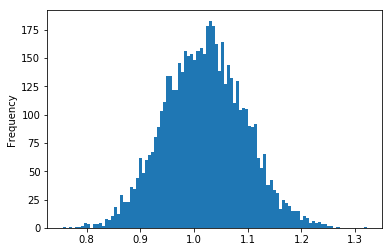

In [25]:
%matplotlib inline

#Plotar um gráfico de distribuição da relação F/M
df_brasil['RELACAO_FM'].plot.hist(bins=100)

In [27]:
#importando as bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt

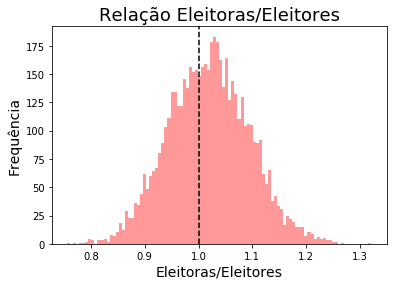

In [30]:
#Plotar a distribuição da relação F/M
sns.distplot(df_brasil['RELACAO_FM'], bins=100, color= 'red', kde=False)

#Embelezando o gráfico
plt.title('Relação Eleitoras/Eleitores', fontsize=18)
plt.xlabel('Eleitoras/Eleitores', fontsize=14)
plt.ylabel('Frequência', fontsize = 14)
plt.axvline(1.0, color='black', linestyle='--')

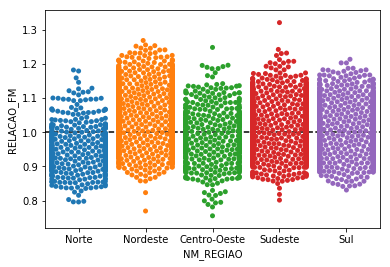

In [32]:
#Verificar a distribuição F/M mas mostrando os pontos ( municípios), dividindo pela região do Brasil
sns.swarmplot(data=df_brasil, x='NM_REGIAO', y='RELACAO_FM')
plt.axhline(1.0, color='black', linestyle='--')

In [39]:
#Vamos plotar a quantidade total de eleitores por faixa etária
#Usando um gráfico de barras horizontal

#Primeiro vamos listar as colunas de nosso interesse
lista = ['QTD_ELEITORES_16','QTD_ELEITORES_17','QTD_ELEITORES_18','QTD_ELEITORES_19','QTD_ELEITORES_20','QTD_ELEITORES_21A24',                
'QTD_ELEITORES_25A29','QTD_ELEITORES_30A34','QTD_ELEITORES_35A39','QTD_ELEITORES_40A44','QTD_ELEITORES_45A49','QTD_ELEITORES_50A54',                
'QTD_ELEITORES_55A59',                
'QTD_ELEITORES_60A64',                
'QTD_ELEITORES_65A69',                
'QTD_ELEITORES_70A74',                
'QTD_ELEITORES_75A79',                
'QTD_ELEITORES_80A84',                
'QTD_ELEITORES_85A89',                
'QTD_ELEITORES_90A94',                
'QTD_ELEITORES_95A99',                
'QTD_ELEITORES_MAIORIGUAL100']
total_idades = df[lista].sum()

In [40]:
total_idades

QTD_ELEITORES_16                 403683
QTD_ELEITORES_17                 996934
QTD_ELEITORES_18                2326608
QTD_ELEITORES_19                2817706
QTD_ELEITORES_20                3034507
QTD_ELEITORES_21A24            12650382
QTD_ELEITORES_25A29            15260717
QTD_ELEITORES_30A34            15890254
QTD_ELEITORES_35A39            16207393
QTD_ELEITORES_40A44            14224025
QTD_ELEITORES_45A49            12828382
QTD_ELEITORES_50A54            12223143
QTD_ELEITORES_55A59            10691738
QTD_ELEITORES_60A64             8907997
QTD_ELEITORES_65A69             6811288
QTD_ELEITORES_70A74             4763343
QTD_ELEITORES_75A79             3170195
QTD_ELEITORES_80A84             1972721
QTD_ELEITORES_85A89             1121775
QTD_ELEITORES_90A94              689078
QTD_ELEITORES_95A99              272447
QTD_ELEITORES_MAIORIGUAL100       39049
dtype: int64

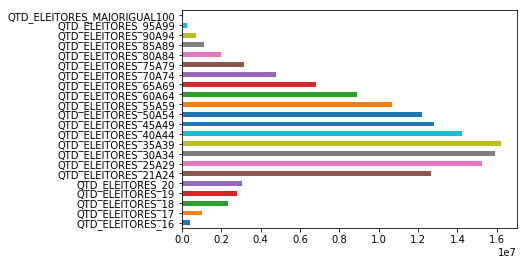

In [41]:
#Mostrando no gráfico de barras horizontal
total_idades.plot.barh()